<a href="https://colab.research.google.com/github/annasweet2339/MONAI/blob/main/MONAI_Getting_Started_Exploration_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prcatice!!!
### We will introduce:
1. **MONAI Getting Started**
    - Transformation
    - Datset
    - Network
    


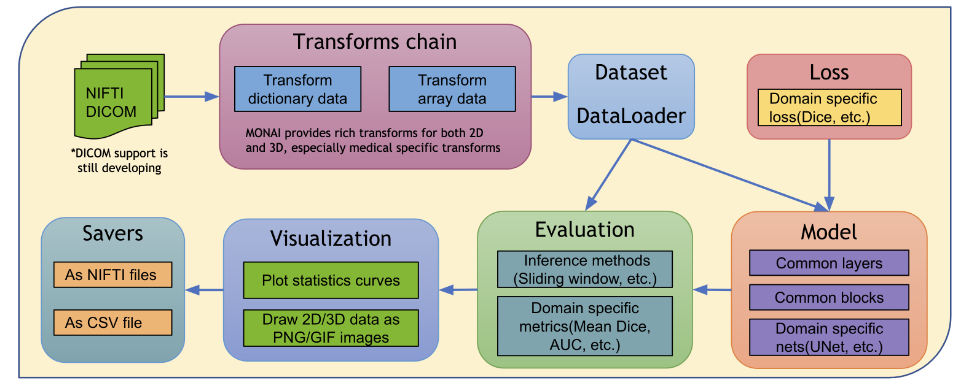

### Reference: <a href="https://github.com/Project-MONAI/MONAIBootcamp2021">MONAI bootcamp 2021</a>

In [1]:
!pip install monai==0.9.1 nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 990 kB 32.0 MB/s 


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib # NiBabel 是一個專門用於處理醫學與神經影像的模組，對於 NIfTI 影像格式支援度非常好
import monai
import torch

## Creating dummy data
- monai.data.create_test_image_3d

In [4]:
keys = ["img", "seg"]
filenames = []
root_dir = './data'
!mkdir $root_dir
n_data = 5

for i in range(n_data):
    im, seg = monai.data.create_test_image_3d(256, 256, 256, num_objs=25, rad_max=50) 
    # create_test_image_3d: Returns Randomised Numpy array with shape (width, height, depth)
    # num_objs (int) – number of circles to generate.
    # ad_max (int) – maximum circle radius. Defaults to 30.

    im_filename = f"{root_dir}/im{i}.nii.gz"
    seg_filename = f"{root_dir}/seg{i}.nii.gz"
    filenames.append({"img": im_filename, "seg": seg_filename})

    print('#################### %d ####################' % i)

    n = nib.Nifti1Image(im, np.eye(4)) # Nifti1Image: Class for single file NIfTI1 format image
    nib.save(n, im_filename)
    print('#################### %d im ####################' % i)
    print(n)

    n = nib.Nifti1Image(seg, np.eye(4))
    nib.save(n, seg_filename)
    print('#################### %d seg ####################' % i)
    print(n)

mkdir: cannot create directory ‘./data’: File exists
#################### 0 ####################
#################### 0 im ####################
<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 256)
affine: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin          

In [5]:
!ls './data'

im0.nii.gz  im2.nii.gz	im4.nii.gz   seg1.nii.gz  seg3.nii.gz
im1.nii.gz  im3.nii.gz	seg0.nii.gz  seg2.nii.gz  seg4.nii.gz


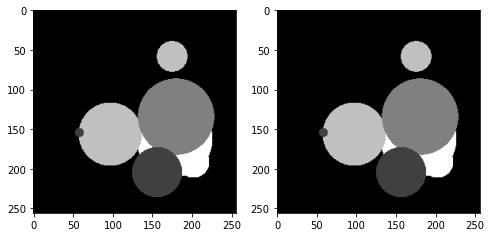

In [6]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(im[128], cmap='gray')
plt.subplot(122)
plt.imshow(seg[128], cmap='gray')
plt.show()

In [7]:
im.min(), im.max(), seg.max()

# 不能寫min(im) 因為他是numpy那種型態  Numpy 格式的資料是進行每個元素的判斷的。

(0.0, 1.0, 5)

## Transforms
https://docs.monai.io/en/latest/transforms.html
- monai.transforms

"Medical images require highly specialized methods for **I/O, preprocessing, and augmentation**. Medical images are often in specialized formats with rich meta-information, and the data volumes are often high-dimensional. These require carefully designed manipulation procedures. The medical imaging focus of MONAI is enabled by powerful and flexible image transformations that facilitate user-friendly, reproducible, optimized medical data pre-processing pipelines." <a href="https://docs.monai.io/en/latest/highlights.html#medical-image-data-i-o-processing-and-augmentation">Source</a>

In [13]:
trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), # I/O
                                  monai.transforms.AddChannel(), # Pre-processing ex: (256, 256) -> (1, 256, 256)
                                  monai.transforms.RandGaussianNoise(prob=0.5, std=0.5), # Augmentation
                                  monai.transforms.ToTensor()]) # Pre-processing

# AddChannel 在將它們用於建模之前，可能必須給圖像添加顯式通道尺寸。這不會添加新數據； 取而代之的是，它將數組數據結構更改為具有一個具有附加維度的附加第三軸，以保存灰度像素值。
# 例如，尺寸為[rows],[cols]的灰度圖像可以更改為[rows],[cols],[channels]或[channels],[rows],[cols]，其中新的[channels]軸具有一維。



In [14]:
filenames[0]

{'img': './data/im0.nii.gz', 'seg': './data/seg0.nii.gz'}

<class 'torch.Tensor'> torch.Size([1, 256, 256, 256])


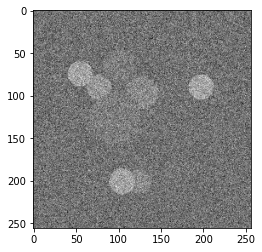

In [15]:
# Run this cell several times to check the rand term
img = trans(filenames[0]["img"])
print(type(img), img.shape)
plt.imshow(img[0, 128], cmap='gray')

1. Customize transforms: Lambda
    - monai.transforms.Lambda

In [22]:
img

tensor([[[[-1.5521e-01,  8.4325e-02, -8.7543e-02,  ...,  5.8237e-02,
            3.4302e-01,  5.4403e-01],
          [-6.0023e-01, -4.2574e-01,  1.8869e-01,  ...,  4.1673e-01,
           -6.3141e-01, -4.4597e-01],
          [-6.9756e-01,  3.3104e-01,  4.4874e-01,  ...,  7.1976e-01,
           -8.1337e-01,  5.7036e-01],
          ...,
          [ 5.0532e-01,  1.2516e-01, -6.4514e-01,  ...,  2.0643e-01,
           -2.4537e-01, -2.0647e-01],
          [-7.5773e-02,  3.4966e-01,  1.7394e-02,  ...,  1.3263e-01,
            5.9742e-02,  5.7835e-01],
          [ 4.7106e-01,  3.7006e-01, -1.8128e-01,  ...,  4.1376e-01,
            5.5077e-01, -2.0967e-01]],

         [[-2.6580e-01, -3.6203e-01,  8.6831e-01,  ...,  2.5978e-01,
           -3.6546e-03,  1.1832e+00],
          [-7.1845e-01, -4.2404e-01, -2.5682e-01,  ...,  4.3609e-01,
           -1.9403e-01,  2.8451e-01],
          [-3.2580e-01,  9.4877e-03,  2.0703e-01,  ...,  6.8916e-01,
           -5.2970e-01,  2.5596e-01],
          ...,
     

In [19]:
img.sum(1)

tensor([[[  2.2871,  -1.8280,   7.4678,  ...,  -8.2185,  -7.3322,  10.3959],
         [  7.6855,  -0.7867,   9.3869,  ...,  -3.6498,  -2.8419,   0.4030],
         [ 10.0128,  -4.7883, -15.4814,  ...,   4.1707, -15.8298,   1.4390],
         ...,
         [ -4.9143,  12.1286,   0.4112,  ...,  -1.3906,   3.3124, -10.0008],
         [  3.2772,   5.0281,  -4.1567,  ...,   3.3835,  -3.8609,  10.6913],
         [  0.1716,   7.7434,   1.2054,  ...,  -4.8568,   4.1323,   2.9530]]])

In [18]:
filenames[0]["img"]

'./data/im0.nii.gz'

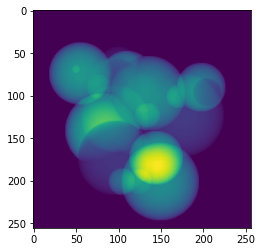

In [23]:
def sum_width(img):
    return img.sum(1)
# ex: 
# x = np.array([[0, 1], [1, 1], [2, 2]])
# x.sum(1)
# array([1, 2, 4])

trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                  monai.transforms.AddChannel(), 
                                  monai.transforms.Lambda(sum_width)])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

In [24]:
img

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Metadata
	sizeof_hdr: 348
	extents: 0
	session_error: 0
	dim_info: 0
	dim: [  3 256 256 256   1   1   1   1]
	intent_p1: 0.0
	intent_p2: 0.0
	intent_p3: 0.0
	intent_code: 0
	datatype: 16
	bitpix: 32
	slice_start: 0
	pixdim: [1. 1. 1. 1. 1. 1. 1. 1.]
	vox_offset: 0.0
	scl_slope: nan
	scl_inter: nan
	slice_end: 0
	slice_code: 0
	xyzt_units: 0
	cal_max: 0.0
	cal_min: 0.0
	slice_duration: 0.0
	toffset: 0.0
	glmax: 0
	glmin: 0
	qform_code: 0
	sform_code: 2
	quatern_b: 0.0
	quatern_c: 0.0
	quatern_d: 0.0
	qoffset_x: 0.0
	qoffset_y: 0.0
	qoffset_z: 0.0
	srow_x: [1. 0. 0. 0.]
	srow_y: [0. 1. 0. 0.]
	srow_z: [0. 0. 1. 0.]
	affine: tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dty

2. Customize transforms: inherit 繼承

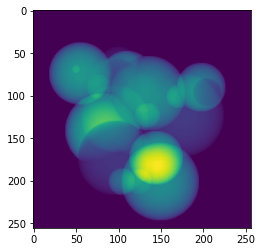

In [27]:
class SumDimension(monai.transforms.Transform):
    def __init__(self, dim=1):
        self.dim = dim

    def __call__(self, inputs):
      # 因為monai.transforms.Transform有一個抽象方法__call__  所以繼承的時候要寫上這個方法  不然會有錯
      # 關於 __call__ 方法，不得不先提到一個概念，就是可呼叫物件（callable），
      # 我們平時自定義的函式、內建函式和類都屬於可呼叫物件，但凡是可以把一對括號()應用到某個物件身上都可稱之為可呼叫物件，判斷物件是否為可呼叫物件可以用函式 callable
        return inputs.sum(self.dim)

trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                  monai.transforms.AddChannel(), 
                                  SumDimension()])
img = trans(filenames[0]["img"])
plt.imshow(img[0])

#### Exercise

<class 'torch.Tensor'> torch.Size([1, 100, 100, 100])


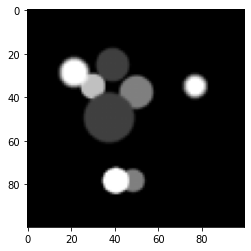

In [34]:
# Try to implement the transforms below into Compose()
#   -  monai.transforms.Resize, size=(100, 100, 100) 
#   -  monai.transforms.RandFlip, prob=0.5

trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                  monai.transforms.AddChannel(), 
                                  monai.transforms.Resize(spatial_size=(100, 100, 100)),# Resize
                                  monai.transforms.RandFlip(prob=0.5),# RandFlip
                                  monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),
                                  monai.transforms.ToTensor(),])

img = trans(filenames[0]["img"])
print(type(img), img.shape)
plt.imshow(img[0, 50], cmap='gray')

In [35]:
# Fix the Normalize transform (mean=0, std=1)
class Normalize(monai.transforms.Transform):
    def __init__(self, mean=0, std=1):
        self.mean=mean
        self.std=std

    def __call__(self, inputs):
        return (inputs - self.mean) / self.std
    
trans = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                  monai.transforms.AddChannel()])

trans_norm = monai.transforms.Compose([monai.transforms.LoadImage(image_only=True), 
                                       monai.transforms.AddChannel(), 
                                       Normalize()])

img = trans(filenames[0]["img"])
img_norm = trans_norm(filenames[0]["img"])
print('Original mean:', img.mean(), ', std:', img.std())
print('Normalized mean:', img_norm.mean(), ', std:', img_norm.std())

Original mean: tensor(0.0754)
Metadata
	sizeof_hdr: 348
	extents: 0
	session_error: 0
	dim_info: 0
	dim: [  3 256 256 256   1   1   1   1]
	intent_p1: 0.0
	intent_p2: 0.0
	intent_p3: 0.0
	intent_code: 0
	datatype: 16
	bitpix: 32
	slice_start: 0
	pixdim: [1. 1. 1. 1. 1. 1. 1. 1.]
	vox_offset: 0.0
	scl_slope: nan
	scl_inter: nan
	slice_end: 0
	slice_code: 0
	xyzt_units: 0
	cal_max: 0.0
	cal_min: 0.0
	slice_duration: 0.0
	toffset: 0.0
	glmax: 0
	glmin: 0
	qform_code: 0
	sform_code: 2
	quatern_b: 0.0
	quatern_c: 0.0
	quatern_d: 0.0
	qoffset_x: 0.0
	qoffset_y: 0.0
	qoffset_z: 0.0
	srow_x: [1. 0. 0. 0.]
	srow_y: [0. 1. 0. 0.]
	srow_z: [0. 0. 1. 0.]
	affine: tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=torch.float64)
	original_affine: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
	as_closest_canonical: False
	spatial_shape: [256 256 256]
	original_channel_dim: no_channel
	filename_or_obj: data/im0.nii.gz

Applied

## Dictionary Transforms
https://docs.monai.io/en/latest/transforms.html#dictionary-transforms

In [36]:
keys

['img', 'seg']

In [37]:
# Dictionary version, the input data should be dictionary with keys
trans = monai.transforms.Compose([monai.transforms.LoadImaged(keys), # I/O
                                  monai.transforms.AddChanneld(keys), # Pre-processing
                                  monai.transforms.RandGaussianNoised(keys='img', prob=0.5, std=0.5), # Augmentation
                                  monai.transforms.ToTensord(keys)]) # Pre-processing

In [38]:
filenames[0]

{'img': './data/im0.nii.gz', 'seg': './data/seg0.nii.gz'}

<class 'dict'> torch.Size([1, 256, 256, 256]) -1


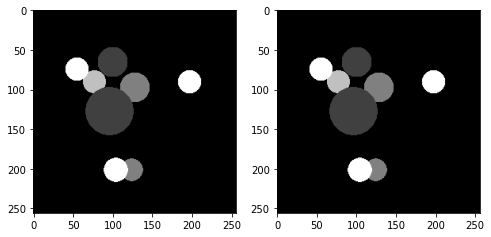

In [39]:
img_seg = trans(filenames[0])
print(type(img_seg), img_seg['img'].shape, img_seg['img'].get_device())
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(img_seg['img'][0, 128], cmap='gray')
plt.subplot(122)
plt.imshow(img_seg['seg'][0, 128], cmap='gray')

#### Exercise

In [48]:
# Fix the saveOriginalShaped transform

class SaveOriginalShaped(monai.transforms.MapTransform):
    def __init__(self, img_key, shape_key='ori_shape'):
        self.img_key = img_key
        self.shape_key = shape_key

    def __call__(self, inputs):
        d = dict(inputs)
        print(d.keys())
        if self.shape_key not in d:
            d[self.shape_key] = self.img_key
        print(d.keys())
        return d
   
trans = monai.transforms.Compose([monai.transforms.LoadImaged(keys), 
                                  monai.transforms.AddChanneld(keys), 
                                  SaveOriginalShaped('img', 'shape'),
                                  monai.transforms.Resized(keys, spatial_size=(100, 100, 100),),
                                  monai.transforms.ToTensord(keys)])

img_seg = trans(filenames[0])
img_seg['img'].shape, img_seg['shape']

dict_keys(['img', 'seg', 'img_meta_dict', 'seg_meta_dict'])
dict_keys(['img', 'seg', 'img_meta_dict', 'seg_meta_dict', 'shape'])


(torch.Size([1, 100, 100, 100]), 'img')

## GPU Accelerated Transforms

- Without GPU Accelerated

In [49]:
trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),
              monai.transforms.ToDevice(device='cuda:0'),]    
trans = monai.transforms.Compose(trans_list)

n = 20
t1 = time.time()
for i in range(n):
    img = trans(filenames[0]["img"])
t2 = time.time()
print(round((t2-t1)/n, 4))

0.676


- With GPU Accelerated

In [50]:
trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.ToDevice(device='cuda:0'),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),]    
trans = monai.transforms.Compose(trans_list)

n = 20
t1 = time.time()
for i in range(n):
    img = trans(filenames[0]["img"])
t2 = time.time()
print(round((t2-t1)/n, 4))

0.3537


## Dataset
https://docs.monai.io/en/latest/data.html
- monai.data.Dataset

"Users often need to train the model with many (potentially thousands of) epochs over the data to achieve the desired model quality. A native PyTorch implementation may repeatedly load data and run the same preprocessing steps for every epoch during training, which can be time-consuming and unnecessary, especially when the medical image volumes are large." <a href="https://docs.monai.io/en/latest/highlights.html#datasets-and-dataloader">Source</a>

In [51]:
items = [{"data": 1}, 
         {"data": 2}, 
         {"data": 3}, 
         {"data": 4}, 
         {"data": 5},
         {"data": 6},
         {"data": 7}]
dataset = monai.data.Dataset(items, transform=None)

print(f"Length of dataset is {len(dataset)}")
for item in dataset:
    print(item)

Length of dataset is 7
{'data': 1}
{'data': 2}
{'data': 3}
{'data': 4}
{'data': 5}
{'data': 6}
{'data': 7}


In [52]:
# Compatible with the PyTorch DataLoader
for item in torch.utils.data.DataLoader(dataset, batch_size=2):
    print(item)

{'data': tensor([1, 2])}
{'data': tensor([3, 4])}
{'data': tensor([5, 6])}
{'data': tensor([7])}


### Dataset Caching

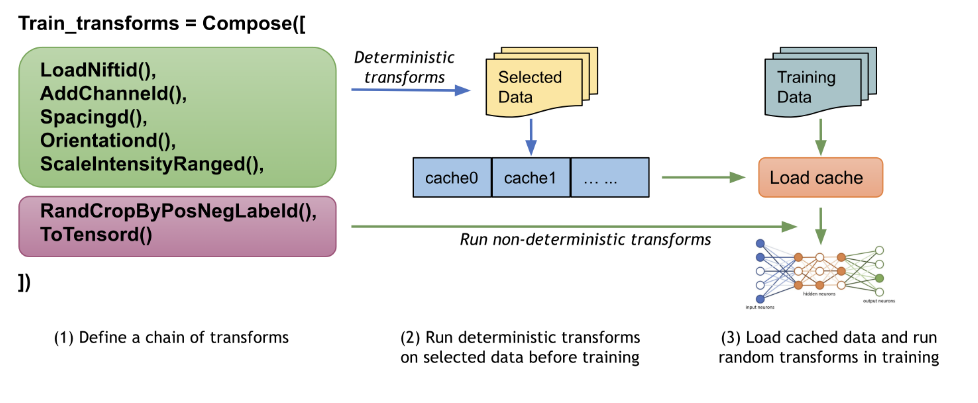

In [53]:
class SlowSquare(monai.transforms.MapTransform):
    def __init__(self, keys):
        monai.transforms.MapTransform.__init__(self, keys)

    def __call__(self, x):
        time.sleep(1.0) # delay 1 second here
        output = {key: x[key] ** 2 for key in self.keys}
        return output

square_dataset = monai.data.Dataset(items, transform=SlowSquare(keys='data'))

In [54]:
%time for item in square_dataset: print(item)

{'data': 1}
{'data': 4}
{'data': 9}
{'data': 16}
{'data': 25}
{'data': 36}
{'data': 49}
CPU times: user 39.8 ms, sys: 6.02 ms, total: 45.9 ms
Wall time: 7.01 s


### CacheDataset

In [55]:
square_cached = monai.data.CacheDataset(items, transform=SlowSquare(keys='data'))

Loading dataset: 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]


In [56]:
%time for item in square_cached: print(item)

{'data': 1}
{'data': 4}
{'data': 9}
{'data': 16}
{'data': 25}
{'data': 36}
{'data': 49}
CPU times: user 407 µs, sys: 0 ns, total: 407 µs
Wall time: 317 µs


### PersistentDataset

In [57]:
!rm -r my_cache
square_persist = monai.data.PersistentDataset(items, transform=SlowSquare(keys='data'), cache_dir="my_cache")

rm: cannot remove 'my_cache': No such file or directory


In [58]:
!ls my_cache/

In [59]:
%time for item in square_persist: print(item)

{'data': 1}
{'data': 4}
{'data': 9}
{'data': 16}
{'data': 25}
{'data': 36}
{'data': 49}
CPU times: user 44.3 ms, sys: 11.6 ms, total: 55.9 ms
Wall time: 7.02 s


In [60]:
!ls my_cache/

1257dfae3534518a1e7952d258c8792b.pt  89f8982b229a46956cd09956d7f5e575.pt
3d387df3250e7ce6ef754813a58de728.pt  a338dd9f228572a3cc1896c789569500.pt
65f06620bbaaf60cc1de433b6038ddfc.pt  df61b5807a42a964f7fdfc565a6989ef.pt
755d77b67f942e5f1d1fda27fe93863a.pt


In [61]:
%time for item in square_persist: print(item)

{'data': 1}
{'data': 4}
{'data': 9}
{'data': 16}
{'data': 25}
{'data': 36}
{'data': 49}
CPU times: user 7.76 ms, sys: 1.12 ms, total: 8.88 ms
Wall time: 7.67 ms


### Exploration of CacheDataset and GPU Acceleration

- Put the preprocessing transforms in the right position

In [62]:
## Right
class SlowSquare(monai.transforms.Transform):
    def __init__(self):
        None

    def __call__(self, inputs):
        time.sleep(1.0) # delay 1 second here
        inputs = inputs ** 2
        return inputs

trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              SlowSquare(),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),
              monai.transforms.ToDevice(device='cuda:0'),]    
trans = monai.transforms.Compose(trans_list)

data = [filenames[0]["img"] for i in range(5)]
cached = monai.data.CacheDataset(data, transform=trans)

n = 2
t1 = time.time()
for i in range(n):
    for i in cached:
        i.shape
t2 = time.time()
print(round((t2-t1)/(n*len(cached)), 4))

Loading dataset: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]


0.1151


In [63]:
## Wrong
trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),# 這個應該移到SlowSquare(),之下
              SlowSquare(),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),
              monai.transforms.ToDevice(device='cuda:0'),]     
trans = monai.transforms.Compose(trans_list)

data = [filenames[0]["img"] for i in range(5)]
cached = monai.data.CacheDataset(data, transform=trans)

n = 2
t1 = time.time()
for i in range(n):
    for i in cached:
        i.shape
t2 = time.time()
print(round((t2-t1)/n, 4))

Loading dataset: 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]


5.5649


- GPU Acceleration

In [64]:
trans_list = [monai.transforms.LoadImage(image_only=True),
              monai.transforms.EnsureType(),
              monai.transforms.ToDevice(device='cuda:0'),
              monai.transforms.AddChannel(), 
              monai.transforms.ScaleIntensityRange(-1, 1),
              SlowSquare(),
              monai.transforms.RandSpatialCrop(roi_size=(192, 192, 192)),
              monai.transforms.Resize([100, 100, 100]),
              monai.transforms.RandFlip(prob=1),
              monai.transforms.RandGaussianNoise(prob=0.5, std=0.5),]    
trans = monai.transforms.Compose(trans_list)

data = [filenames[0]["img"] for i in range(5)]
cached = monai.data.CacheDataset(data, transform=trans)

n = 20
t1 = time.time()
for i in range(n):
    for i in cached:
        i.shape
t2 = time.time()
print(round((t2-t1)/(n*len(cached)), 4))

Loading dataset: 100%|██████████| 5/5 [00:06<00:00,  1.33s/it]


0.0217


## Network
https://docs.monai.io/en/latest/networks.html

#### Built-in network
- https://docs.monai.io/en/latest/networks.html#nets

In [65]:
net = monai.networks.nets.UNet(
    dimensions=3,  # 2 or 3 for a 2D or 3D network
    in_channels=1,  # number of input channels
    out_channels=1,  # number of output channels
    channels=[8, 16],  # channel counts for layers
    strides=[2]  # strides for mid layers
)

In [66]:
net

UNet(
  (model): Sequential(
    (0): Convolution(
      (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(8, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): PReLU(num_parameters=1)
      )
    )
    (1): SkipConnection(
      (submodule): Convolution(
        (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (adn): ADN(
          (N): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
          (D): Dropout(p=0.0, inplace=False)
          (A): PReLU(num_parameters=1)
        )
      )
    )
    (2): Convolution(
      (conv): ConvTranspose3d(24, 1, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), output_padding=(1, 1, 1))
    )
  )
)

In [67]:
net(torch.ones(2, 1, 24, 24, 24)).shape

torch.Size([2, 1, 24, 24, 24])

## Multi-GPU
- Tutorials: https://github.com/Project-MONAI/tutorials/tree/master/acceleration/distributed_training
- Horovod: https://github.com/horovod/horovod

## Exercise

1. Create a dummy dataset

In [68]:
keys = ["img", "seg"]
filenames = []
root_dir = './data_exercise'
!mkdir $root_dir
n_data = 8

for i in range(n_data):
    im, seg = monai.data.create_test_image_3d(256, 256, 256, num_objs=20, rad_max=40) 
    # create_test_image_3d: Returns Randomised Numpy array with shape (width, height, depth)
    # num_objs (int) – number of circles to generate.
    # ad_max (int) – maximum circle radius. Defaults to 30.

    im_filename = f"{root_dir}/im{i}.nii.gz"
    seg_filename = f"{root_dir}/seg{i}.nii.gz"
    filenames.append({"img": im_filename, "seg": seg_filename})

    print('#################### %d ####################' % i)

    n = nib.Nifti1Image(im, np.eye(4)) # Nifti1Image: Class for single file NIfTI1 format image
    nib.save(n, im_filename)
    print('#################### %d im ####################' % i)
    print(n)

    n = nib.Nifti1Image(seg, np.eye(4))
    nib.save(n, seg_filename)
    print('#################### %d seg ####################' % i)
    print(n)

#################### 0 ####################
#################### 0 im ####################
<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 256)
affine: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qfor

2. Define a GPU accelerated dictionary transformation with `LoadImaged`, `AddChanneld`, `AddShiftIntensityd`, `RandSpatialCropd` and `ToTensord`

In [76]:
filenames[0]['img']

'./data_exercise/im0.nii.gz'

In [88]:
trans_list = [monai.transforms.LoadImaged(keys),
              monai.transforms.ToDeviced(keys, device='cuda:0'),
              monai.transforms.AddChanneld(keys), 
              # monai.transforms.AddShiftIntensityd(keys), 
              # SlowSquare(),
              monai.transforms.RandSpatialCropd(keys, roi_size=(192, 192, 192)),
              monai.transforms.ToTensord(keys)
              ]  

# trans = monai.transforms.Compose([monai.transforms.LoadImaged(keys), 
#                                   monai.transforms.AddChanneld(keys), 
#                                   SaveOriginalShaped('img', 'shape'),
#                                   monai.transforms.Resized(keys, spatial_size=(100, 100, 100),),
#                                   monai.transforms.ToTensord(keys)])
  
trans = monai.transforms.Compose(trans_list)
data = [{"img": filenames[i]["img"], "seg": filenames[i]["seg"]} for i in range(8)]
print(data)
cached = monai.data.CacheDataset(data, transform=trans)

# img_seg = trans(filenames[0])
# img_seg['img'].shape, img_seg['shape']


n = 20
t1 = time.time()
for i in range(n):
    for i in cached:
        i['img'].shape
t2 = time.time()
print(round((t2-t1)/(n*len(cached)), 4))

[{'img': './data_exercise/im0.nii.gz', 'seg': './data_exercise/seg0.nii.gz'}, {'img': './data_exercise/im1.nii.gz', 'seg': './data_exercise/seg1.nii.gz'}, {'img': './data_exercise/im2.nii.gz', 'seg': './data_exercise/seg2.nii.gz'}, {'img': './data_exercise/im3.nii.gz', 'seg': './data_exercise/seg3.nii.gz'}, {'img': './data_exercise/im4.nii.gz', 'seg': './data_exercise/seg4.nii.gz'}, {'img': './data_exercise/im5.nii.gz', 'seg': './data_exercise/seg5.nii.gz'}, {'img': './data_exercise/im6.nii.gz', 'seg': './data_exercise/seg6.nii.gz'}, {'img': './data_exercise/im7.nii.gz', 'seg': './data_exercise/seg7.nii.gz'}]


Loading dataset: 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]


0.0016


3. Implement `CacheDataset`/`PersistentDataset` with PyTorch DataLoader

In [107]:
class SlowSquare2(monai.transforms.MapTransform):
    def __init__(self, keys):
        monai.transforms.MapTransform.__init__(self, keys)

    def __call__(self, x):
        time.sleep(1.0) # delay 1 second here
        output = {key: x[key] ** 2 for key in self.keys}
        return output

items = [{"data": 1}, 
         {"data": 2}, 
         {"data": 3}, 
         {"data": 4}, 
         {"data": 5},
         {"data": 6},
         {"data": 7}]

dataset = monai.data.Dataset(items, transform=None)
items = [item for item in torch.utils.data.DataLoader(dataset, batch_size=1,persistent_workers=False,num_workers=0)]
print(items)
square_cached = monai.data.CacheDataset(items, transform=SlowSquare2(keys='data'))
%time for item in square_cached: print(item)

[{'data': tensor([1])}, {'data': tensor([2])}, {'data': tensor([3])}, {'data': tensor([4])}, {'data': tensor([5])}, {'data': tensor([6])}, {'data': tensor([7])}]


Loading dataset: 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]

{'data': tensor([1])}
{'data': tensor([4])}
{'data': tensor([9])}
{'data': tensor([16])}
{'data': tensor([25])}
{'data': tensor([36])}
{'data': tensor([49])}
CPU times: user 1.8 ms, sys: 0 ns, total: 1.8 ms
Wall time: 1.69 ms


In [109]:
!rm -r my_cache
square_persist = monai.data.PersistentDataset(items, transform=SlowSquare2(keys='data'), cache_dir="my_cache")

rm: cannot remove 'my_cache': No such file or directory


In [110]:
%time for item in square_persist: print(item)

{'data': tensor([1])}
{'data': tensor([4])}
{'data': tensor([9])}
{'data': tensor([16])}
{'data': tensor([25])}
{'data': tensor([36])}
{'data': tensor([49])}
CPU times: user 47 ms, sys: 17.8 ms, total: 64.8 ms
Wall time: 7.02 s


4. Define a 3D UNet with 2 times pooling and 3 channels outputs

In [111]:
net = monai.networks.nets.UNet(
    dimensions=3,  # 2 or 3 for a 2D or 3D network
    in_channels=1,  # number of input channels
    out_channels=3,  # number of output channels
    channels=[8, 16],  # channel counts for layers
    strides=[2]  # strides for mid layers
)
net

UNet(
  (model): Sequential(
    (0): Convolution(
      (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (adn): ADN(
        (N): InstanceNorm3d(8, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (D): Dropout(p=0.0, inplace=False)
        (A): PReLU(num_parameters=1)
      )
    )
    (1): SkipConnection(
      (submodule): Convolution(
        (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        (adn): ADN(
          (N): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
          (D): Dropout(p=0.0, inplace=False)
          (A): PReLU(num_parameters=1)
        )
      )
    )
    (2): Convolution(
      (conv): ConvTranspose3d(24, 3, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), output_padding=(1, 1, 1))
    )
  )
)

In [112]:
net(torch.ones(2, 1, 24, 24, 24)).shape

torch.Size([2, 3, 24, 24, 24])

5. Feed the data generated by DataLoader to the UNet

In [152]:
network = monai.networks.nets.UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=3,
    channels=(8, 16),
    strides=(3,),
    kernel_size=3,
    up_kernel_size=3,
    num_res_units=0,
    norm="batch",
)
example = torch.rand([2, 1, 1, 1, 1])
print(example)
print(network(example).shape)

tensor([[[[[0.6944]]]],



        [[[[0.2785]]]]])
torch.Size([2, 3, 3, 3, 3])
